
# Linear Regression 

## Imports
** Import pandas, numpy, matplotlib,and seaborn. 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
customers = pd.read_csv('Ecommerce Customers.txt')  # eticaret sitesinin dataları var burada

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
customers.head()  # ilk 5 satır. örnek inceleme. müşteri bilgileri features. yearly amount label. features olabilecekler label ile doğrudan ilişkili olanlar. burada nümerik veriler. 

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0               34.497       12.656           39.578                 4.083   
1               31.926       11.109           37.269                 2.664   
2               33.001       11.330           37.111                 4.105   
3               34.306       13.718           36.721                 3.120   
4               33.331       12.795           37.537                 4.446   

   Yearly Amount Spent  
0              587.951  
1              392.205  
2              487.548  
3              581.852  
4              599.406

In [4]:
customers.shape  # datayı customers adı ile atadık, df değil.

(500, 8)

In [5]:
customers.info() # ilk üç sütun object, diğerleri float. email, address, avatar ı atacağız.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
customers.describe()  #  std sapmanın mean den büyük olduğu zaman outlier.
# Min ile q1 , max ile q3 arasında da çok fark var ise outlier beklenebilir.

Avg. Session Length  Time on App  Time on Website  \
count              500.000      500.000          500.000   
mean                33.053       12.052           37.060   
std                  0.993        0.994            1.010   
min                 29.532        8.508           33.914   
25%                 32.342       11.388           36.349   
50%                 33.082       11.983           37.069   
75%                 33.712       12.754           37.716   
max                 36.140       15.127           40.005   

       Length of Membership  Yearly Amount Spent  
count               500.000              500.000  
mean                  3.533              499.314  
std                   0.999               79.315  
min                   0.270              256.671  
25%                   2.930              445.038  
50%                   3.534              498.888  
75%                   4.127              549.314  
max                   6.923              765.518

## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website, Avg. Session Length, Time on App and Yearly Amount Spent columns. Does the correlation make sense?**

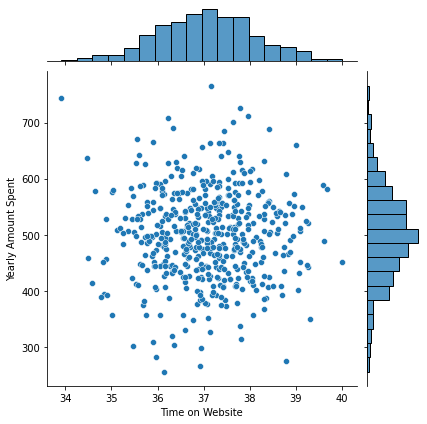

In [7]:
sns.jointplot(customers['Time on Website'], customers['Yearly Amount Spent']) # -0.003 . korele durum görünmüyor.

# yearly amount spent ile featureslarımız arasında jointplotumuzu çizdirelim. jointplot hem scatter plot, hem de bar plot çizdiriyor.

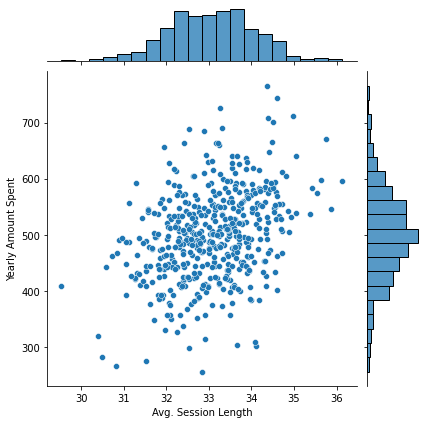

In [8]:
sns.jointplot(customers['Avg. Session Length'], customers['Yearly Amount Spent']) # 0.35. üsttekinden biraz daha fazla korele durum var.

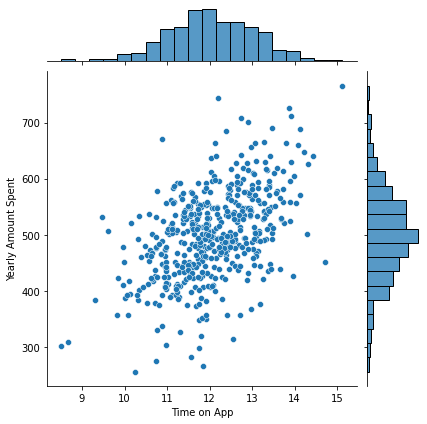

In [9]:
sns.jointplot(customers['Time on App'], customers['Yearly Amount Spent']) # 0.49 . üsttekinden biraz daha fazla korele durum var.

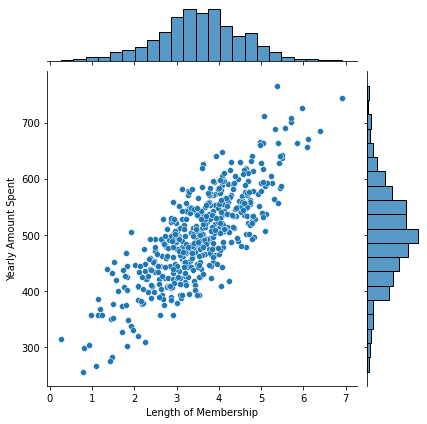

In [10]:
sns.jointplot(customers['Length of Membership'], customers['Yearly Amount Spent']) # 0.80. burada yüksek bir korelasyon var.

In [11]:
customers.corr()   # burada da korelasyon rakamlarını görebiliyoruz.son satırı incele.

Avg. Session Length  Time on App  Time on Website  \
Avg. Session Length                 1.000       -0.028           -0.035   
Time on App                        -0.028        1.000            0.082   
Time on Website                    -0.035        0.082            1.000   
Length of Membership                0.060        0.029           -0.048   
Yearly Amount Spent                 0.355        0.499           -0.003   

                      Length of Membership  Yearly Amount Spent  
Avg. Session Length                  0.060                0.355  
Time on App                          0.029                0.499  
Time on Website                     -0.048               -0.003  
Length of Membership                 1.000                0.809  
Yearly Amount Spent                  0.809                1.000

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

<AxesSubplot:>

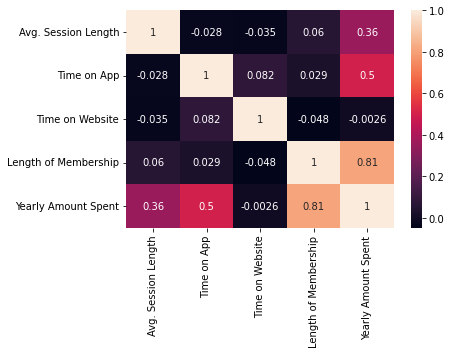

In [12]:
sns.heatmap(customers.corr(), annot = True)    # burada da korelasyon rakamlarını derecelendirilmiş olarak görebiliyoruz. özellikle son satırı incele.

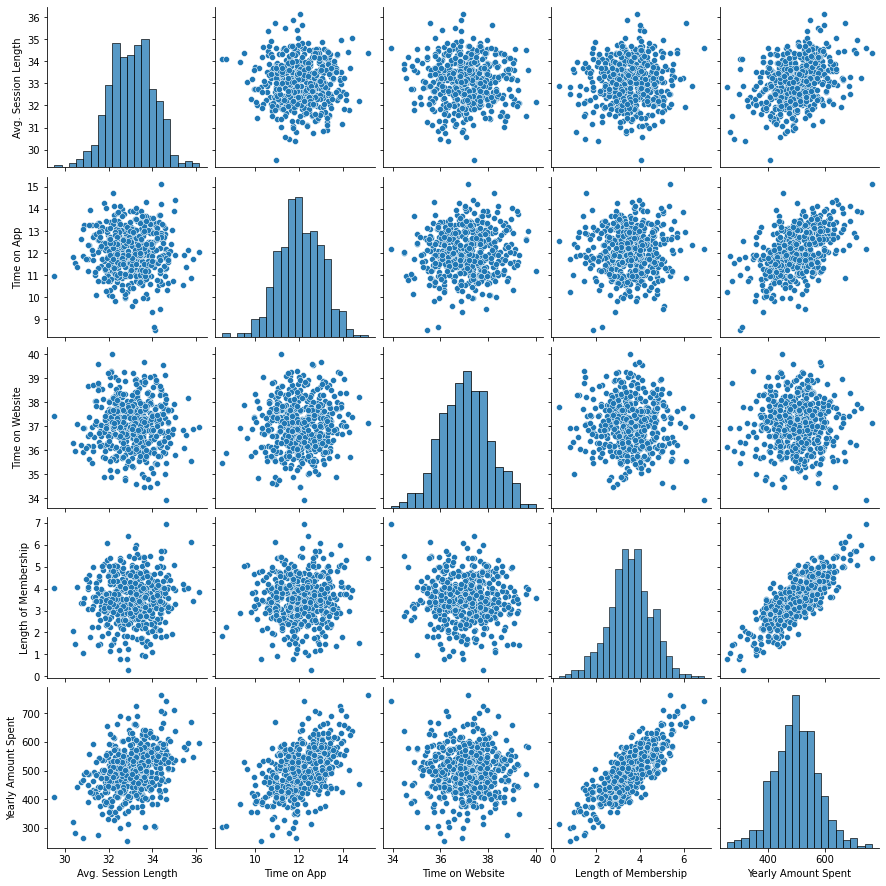

In [13]:
sns.pairplot(customers)   # length of membership ile yearly amount spent arasında bariz korelasyon görünüyor

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [14]:
# Length of Membership. en yüksek korelasyon burada. 

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

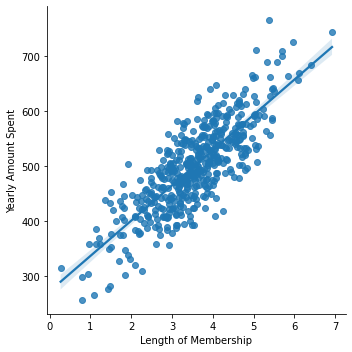

In [14]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers )  

# aralarında lineer bir ilişki gördüğümden, lineer model plotunu çizdirebilirim. simple lineer regression yapsaydım line ım bu şekilde olacaktı.

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **
train ve test datasını ayırıyorum

In [15]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']] # features: columns affecting the target

In [16]:
y = customers['Yearly Amount Spent'] #target column 

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.2 and random_state=101**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) 

#datanın %80 i train, %20si test datası olarak ayırılıyor. 

In [19]:
print("Train features shape : ", X_train.shape)    # modelimi train dataları ile eğitiyorum.
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)     # x test ile bir prediction alıyorum bunu y pred e atıyorum.
print("Test target shape    : ", y_test.shape)     # y test (gerçek değerler) ile y pred i karşılaştırıyorum.

#burada train ve test satrlarını random seçiyor. ilk 400, son 100 şeklnde değil

Train features shape :  (400, 4)
Train target shape   :  (400,)
Test features shape  :  (100, 4)
Test target shape    :  (100,)


## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [20]:
from sklearn.linear_model import LinearRegression  # modelleme yaparken genel olarak sadece bu satır değişmiş olacak

# burada linearReg modelimi import ediyorum

**Create an instance of a LinearRegression() model named lm.**

In [21]:
lm=LinearRegression()  # sürekli yanımda taşımamak adına lm adlı bir değişkene atıyorum 

** Train/fit lm on the training data.**

In [23]:
lm.fit(X_train, y_train)  # eğitim yapıyorum

LinearRegression()

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [25]:
y_pred = lm.predict(X_test)  #predictions. tahminlerimi alıyorum, y_pred e atıyorum

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Y Predictions')

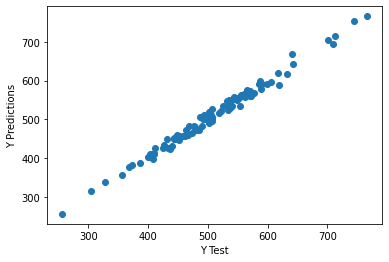

In [26]:
plt.scatter(y_test, y_pred)   # gerçek değerlerim ile tahminlerimi plotluyorum, acaba nasıl ilişkileri var diye
plt.xlabel('Y Test')
plt.ylabel('Y Predictions')

# adeta bir line oluştuğunu görüyorum. gerçek değer ile tahmin ettiğim değerler nerede ise üstüste binmiş.

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

# kolaylık için bu fonksiyonu kullanıyorum. hepsini görebilmek için.

In [31]:
eval_metric(y_test, y_pred) # TEST SCORE. gerçek değerler ile tahmin ettiğim değerleri veriyorum. 

# yüzde 98 lik bir skor aldık. (R2_score) çok iyi.
# MAE ile RMSE birbirne yakınsa ve olabildiğince düşükse modelimin iyi olduğunu düşünürüm.
# datadan dataya hatanın miktarı değişebilir. yorumlarken data bazında bakmak lazım.
# hatalar aslında yüzdesel olrak değerlendirilmeli

Model testing performance:
--------------------------
R2_score 	: 0.9881661299145553
MAE 		: 7.758907540457877
MSE 		: 91.82335857016959
RMSE 		: 9.582450551407483


### The close RMSE and MSE scores show that our model is a good one.

In [32]:
spent_mean = customers['Yearly Amount Spent'].mean()  # yıllık harcama miktarının ortlamasını alıp spent mean e atıyorum
spent_mean

499.31403825859053

In [33]:
mae = mean_absolute_error(y_test, y_pred)  # yukarıda zaten hesaplamıştı. burada gösterme adına tekrar.
mae

7.758907540457877

In [35]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))   # yukarıda zaten hesaplamıştı. burada gösterme adına tekrar.
rmse

9.582450551407483

In [36]:
mae/spent_mean # It is useful to look at the errors superficially. 

# data bazına bakıldığında bu hata yüzde bir gibi bir hata. nerede ise yok gibi.

0.01553913358318118

In [37]:
rmse/spent_mean # It is useful to look at the errors superficially.

# data bazına bakıldığında bu hata da benzer şekilde. nerede ise yok gibi.

0.019191230001918778

In [38]:
y_train_pred = lm.predict(X_train)   

# test setinden değererimi aldıktan sonra train seti ile karşlaştırmam lazım.
# train datası için tahminlerimi alıyorum

In [39]:
eval_metric(y_train, y_train_pred) # TRAİN SCORE   

# train datası için gerçek ve tahminlerimi eval metric e veriyorum
# her zaman için genelleştirme yapmak istiyorum. bunun için de test ve train değerlerimi karşılaştırmak istiyorum.

Model testing performance:
--------------------------
R2_score 	: 0.9829214010726763
MAE 		: 7.930920557925422
MSE 		: 100.37547366830309
RMSE 		: 10.018756093862306


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

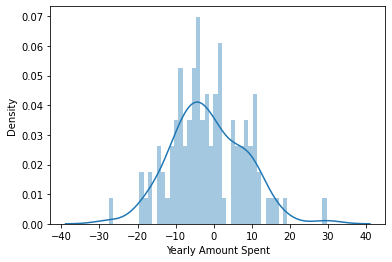

In [40]:
sns.distplot((y_test-y_pred),bins=50);  # Residual = y_test - y_pred

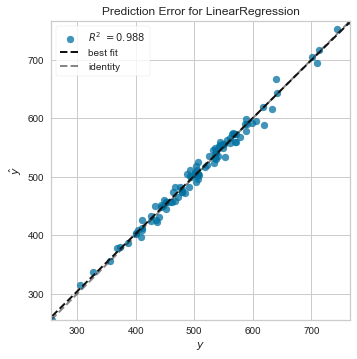

In [41]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [42]:
coefficients = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coefficients

#katsayısı kadar label a ekisi olur. scaling yaptıktan sonra featurelar daha iyi değerlendirilebilir.

Coefficient
Avg. Session Length        26.029
Time on App                38.710
Time on Website             0.356
Length of Membership       61.473

** How can you interpret these coefficients? **

Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 26.029 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of  38.710 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.356 total dollars spent.
Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.473 total dollars spent.

**Do you think the company should focus more on their mobile app or on their website?**

###### This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.